# L4. Crearea unei rețele neuronale cu straturi Dense pentru operații simple.
## (de exemplu pentru clasificare binară). Antrenarea rețelei și validarea rezultatelor.

In [8]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import train_test_split
import tensorflow as tf


In [ ]:
data = pd.read_csv("Diabetes Binary Classification.csv")
data.head(3)


,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable (0 or 1)
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


In [13]:
# Check if Data has any null values 
data.isnull().sum()


Number of times pregnant                                                    0
Plasma glucose concentration a 2 hours in an oral glucose tolerance test    0
Diastolic blood pressure (mm Hg)                                            0
Triceps skin fold thickness (mm)                                            0
2-Hour serum insulin (mu U/ml)                                              0
Body mass index (weight in kg/(height in m)^2)                              0
Diabetes pedigree function                                                  0
Age (years)                                                                 0
Class variable (0 or 1)                                                     0
dtype: int64

In [15]:
# Label encode Object Datatypes 

data_types_dict = dict(data.dtypes)
# Keep track Mappings Column name to LabelEncoders
Label_encoder_collection = {}
for col_name , data_type in data_types_dict.items():
    if data_type == 'object':
        Le = LabelEncoder()
        data[col_name] = Le.fit_transform(data[col_name])
        Label_encoder_collection[col_name] = Le 

data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                                                                    Non-Null Count  Dtype  
---  ------                                                                    --------------  -----  
 0   Number of times pregnant                                                  768 non-null    int64  
 1   Plasma glucose concentration a 2 hours in an oral glucose tolerance test  768 non-null    int64  
 2   Diastolic blood pressure (mm Hg)                                          768 non-null    int64  
 3   Triceps skin fold thickness (mm)                                          768 non-null    int64  
 4   2-Hour serum insulin (mu U/ml)                                            768 non-null    int64  
 5   Body mass index (weight in kg/(height in m)^2)                            768 non-null    float64
 6   Diabetes pedigree function                                         

In [17]:
data.head()


,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable (0 or 1)
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [19]:
X = data.iloc[: , :-1].values.astype(np.float32)
Y = data.iloc[: , -1].values.astype(int)


In [21]:
Y


array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,

In [23]:
Xtrain , Xtest , Ytrain , Ytest = train_test_split(X, Y, test_size = 0.3, random_state = 101)


In [25]:
# Start your model with Sequential Object  
model = tf.keras.models.Sequential()
# Next add in your Input object and Specify the Dimension you want to pass in 
model.add(tf.keras.Input(shape=(8,)))
# Add in your Neurons of 1st layer
model.add(tf.keras.layers.Dense(64))
# 2nd layer 
model.add(tf.keras.layers.Dense(32))
# 3nd layer 
model.add(tf.keras.layers.Dense(16))
# Final Sigmoid layer to predict (0/1)
model.add(tf.keras.layers.Dense(1 , activation='sigmoid'))

# print summary to undertstand your neural network flow
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,201 (12.50 KB)

 Trainable params: 3,201 (12.50 KB)

 Non-trainable params: 0 (0.00 B)

In [29]:

# Create your optimizer and compile your model
Optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
model.compile(Optimizer, loss='binary_crossentropy', metrics=["accuracy"])


Help on class Adam in module keras.src.optimizers.adam:

class Adam(keras.src.optimizers.optimizer.Optimizer)
 |  Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False, weight_decay=None, clipnorm=None, clipvalue=None, global_clipnorm=None, use_ema=False, ema_momentum=0.99, ema_overwrite_frequency=None, loss_scale_factor=None, gradient_accumulation_steps=None, name='adam', **kwargs)
 |
 |  Optimizer that implements the Adam algorithm.
 |
 |  Adam optimization is a stochastic gradient descent method that is based on
 |  adaptive estimation of first-order and second-order moments.
 |
 |  According to
 |  [Kingma et al., 2014](http://arxiv.org/abs/1412.6980),
 |  the method is "*computationally
 |  efficient, has little memory requirement, invariant to diagonal rescaling of
 |  gradients, and is well suited for problems that are large in terms of
 |  data/parameters*".
 |
 |  Args:
 |      learning_rate: A float, a
 |          `keras.optimizers.schedules.Learnin

In [32]:
history = model.fit(Xtrain , Ytrain , validation_data=(Xtest , Ytest), epochs=20)


Epoch 1/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.5704 - loss: 19.9696 - val_accuracy: 0.5974 - val_loss: 2.0307
Epoch 2/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5867 - loss: 2.7561 - val_accuracy: 0.6537 - val_loss: 0.8405
Epoch 3/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5978 - loss: 0.8855 - val_accuracy: 0.6710 - val_loss: 0.6774
Epoch 4/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6848 - loss: 0.7074 - val_accuracy: 0.6320 - val_loss: 0.8475
Epoch 5/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6171 - loss: 0.9942 - val_accuracy: 0.5801 - val_loss: 0.8441
Epoch 6/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6410 - loss: 0.6709 - val_accuracy: 0.6840 - val_loss: 0.6145
Epoch 7/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7010 - loss: 0.6157 - val_accuracy: 0.7403 - val_loss: 0.5942
Epoch 8/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6585 - loss: 0.6347 - val_accuracy: 0.7100 - val_los

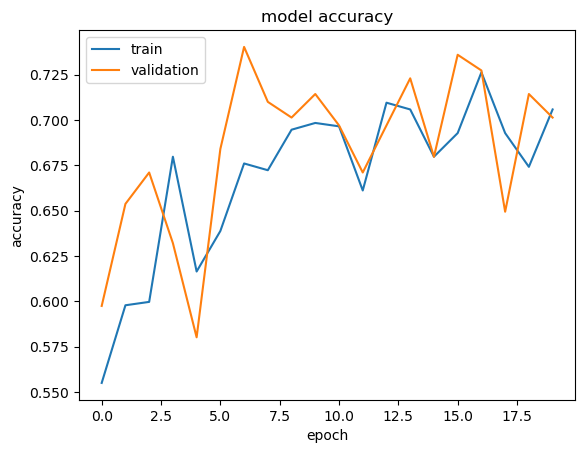

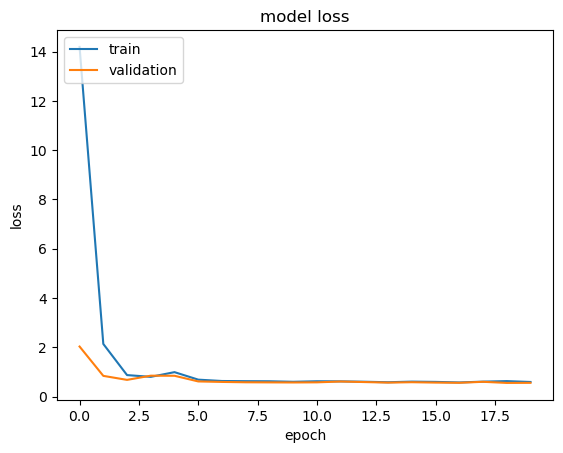

In [34]:
#  "Accuracy Plot"
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# "Loss Plot"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# We see a lot of fluctuations in Accuracy Graph which concludes model learning is unstable


In [36]:
# collect predictions 
predictions = np.round(model.predict(Xtest))


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


In [38]:
# Check Accuracy
from sklearn.metrics import accuracy_score , confusion_matrix
accuracy_score(Ytest , predictions) # Accuracy Seems good


0.7012987012987013

In [40]:
confusion_matrix(Ytest , predictions)


array([[130,  20],
       [ 49,  32]], dtype=int64)

In [42]:
from sklearn.metrics import classification_report 

print(classification_report(Ytest , predictions))



              precision    recall  f1-score   support

           0       0.73      0.87      0.79       150
           1       0.62      0.40      0.48        81

    accuracy                           0.70       231
   macro avg       0.67      0.63      0.64       231
weighted avg       0.69      0.70      0.68       231



In [44]:
# we will try to improve our model's performance 
# ----------- Add class weights when Data is Imbalanced -----------------------
from sklearn.utils.class_weight import compute_class_weight
class_weights = compute_class_weight(class_weight = 'balanced' ,  classes = np.unique(Ytrain), y=Ytrain)

model_class_weights = {}
for e , weight in enumerate(class_weights):
    model_class_weights[e] = weight
    

In [46]:
model_class_weights


{0: 0.7671428571428571, 1: 1.4358288770053476}

In [48]:
history = model.fit(Xtrain , Ytrain , validation_data=(Xtest , Ytest) , epochs=20, class_weight=model_class_weights)


Epoch 1/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6523 - loss: 0.6786 - val_accuracy: 0.5498 - val_loss: 0.7905
Epoch 2/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6463 - loss: 0.6348 - val_accuracy: 0.5931 - val_loss: 0.6717
Epoch 3/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7144 - loss: 0.5778 - val_accuracy: 0.5931 - val_loss: 0.7086
Epoch 4/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7003 - loss: 0.5630 - val_accuracy: 0.5844 - val_loss: 0.7397
Epoch 5/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6511 - loss: 0.6267 - val_accuracy: 0.6623 - val_loss: 0.6123
Epoch 6/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6939 - loss: 0.6149 - val_accuracy: 0.7100 - val_loss: 0.5652
Epoch 7/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7171 - loss: 0.6145 - val_accuracy: 0.6537 - val_loss: 0.7025
Epoch 8/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6328 - loss: 0.7730 - val_accuracy: 0.4589 - val_loss:

In [50]:
# collect predictions 
predictions = np.round(model.predict(Xtest))


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


In [52]:
confusion_matrix(Ytest , predictions)



array([[101,  49],
       [ 16,  65]], dtype=int64)

In [54]:
# Better results for recognizing second-class items, but much worse for first-class items.

In [56]:
# Increase Units in Dense layers and Also Increase Number of Layers 
# Add BatchNormalization to Layers 
# Add Dropout after Layers 

model = tf.keras.models.Sequential()
model.add(tf.keras.Input(shape=(8,)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(128 , activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(64 , activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(32 , activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(16 , activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(1 , activation='sigmoid'))

# print summary to undertstand your neural network flow
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ batch_normalization             │ (None, 8)              │            32 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,961 (50.63 KB)

 Trainable params: 12,497 (48.82 KB)

 Non-trainable params: 464 (1.81 KB)

In [58]:
# Create your optimizer and compile your model
Optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
model.compile(Optimizer, loss='binary_crossentropy', metrics=["accuracy"])


In [60]:
history = model.fit(Xtrain , Ytrain , validation_data=(Xtest , Ytest) , epochs=20)


Epoch 1/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.6485 - loss: 0.6756 - val_accuracy: 0.3506 - val_loss: 4.7292
Epoch 2/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7339 - loss: 0.5194 - val_accuracy: 0.3550 - val_loss: 2.2047
Epoch 3/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7702 - loss: 0.4754 - val_accuracy: 0.3636 - val_loss: 1.4149
Epoch 4/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7419 - loss: 0.4767 - val_accuracy: 0.3723 - val_loss: 1.0587
Epoch 5/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7553 - loss: 0.4984 - val_accuracy: 0.3723 - val_loss: 1.0511
Epoch 6/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7795 - loss: 0.4687 - val_accuracy: 0.4372 - val_loss: 0.8458
Epoch 7/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7933 - loss: 0.4621 - val_accuracy: 0.5195 - val_loss: 0.7902
Epoch 8/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7678 - loss: 0.4548 - val_accuracy: 0.5411 - val_loss

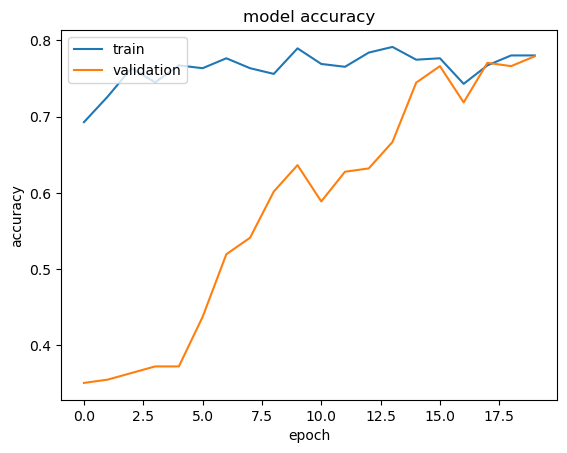

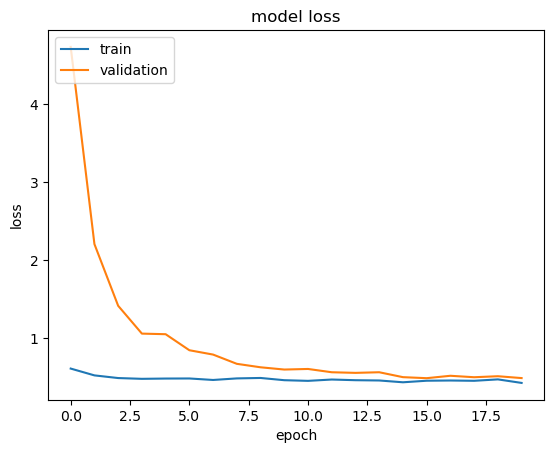

In [62]:
#  "Accuracy Plot"
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# "Loss Plot"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# We see graphs converging better compared to previous implementation


In [64]:
# collect predictions 
predictions = np.round(model.predict(Xtest))


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


In [66]:
# Check Accuracy
accuracy_score(Ytest , predictions) # Accuracy is good


0.7792207792207793

In [68]:
# We don't see the problem of predicting everything as class 0
confusion_matrix(Ytest , predictions)


array([[127,  23],
       [ 28,  53]], dtype=int64)

In [70]:
print(classification_report(Ytest, predictions))


              precision    recall  f1-score   support

           0       0.82      0.85      0.83       150
           1       0.70      0.65      0.68        81

    accuracy                           0.78       231
   macro avg       0.76      0.75      0.75       231
weighted avg       0.78      0.78      0.78       231

